In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('8. Netflix Dataset.csv')

In [3]:
df.head(100)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,28 Moons,NaN,"Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...",South Korea,"June 10, 2017",TV-PG,1 Season,"International TV Shows, Korean TV Shows, Roman...",When her fiancé acts strangely upon receiving ...
96,s97,Movie,3 Days to Kill,McG,"Kevin Costner, Amber Heard, Hailee Steinfeld, ...","United States, France, Serbia","December 1, 2020",PG-13,117 min,Action & Adventure,A terminally ill secret agent accepts a risky ...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
98,s99,Movie,3 Generations,Gaby Dellal,"Elle Fanning, Naomi Watts, Susan Sarandon, Tat...",United States,"August 28, 2017",PG-13,92 min,"Dramas, LGBTQ Movies",When teenage Ray begins transitioning from fem...


In [14]:
def check_df(dataframe, head=5):
    print('######### shape #############')
    print(dataframe.shape)
    print('######### dtypes #############')
    print(dataframe.dtypes)
    print('######### isnull #############')
    print(dataframe.isnull().sum())
    print('######### head #############')
    print(dataframe.head(head))
    print('######### tail #############')
    print(dataframe.tail(head))
    print('######### describe #############')
    print(dataframe.describe())

check_df(df)

######### shape #############
(7789, 11)
######### dtypes #############
Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object
######### isnull #############
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64
######### head #############
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country 

In [4]:
df.isnull().any()

Show_Id         False
Category        False
Title           False
Director         True
Cast             True
Country          True
Release_Date     True
Rating           True
Duration        False
Type            False
Description     False
dtype: bool

In [15]:
def missing_val(data):
    miss=[col for col in data.columns if data[col].isnull().sum() > 0]
    sorts=data[miss].isnull().sum().sort_values(ascending=False)
    ratio=(data[miss].isnull().sum() / data.shape[0] * 100)
    concat=pd.concat([sorts, np.round(ratio, 2)], axis=1, keys=['eksik veri','100% veri'])
    print(concat)

In [16]:
missing_val(df)

              eksik veri  100% veri
Director            2388      30.66
Cast                 718       9.22
Country              507       6.51
Release_Date          10       0.13
Rating                 7       0.09


In [17]:
def grab_col(data, cat_th=10, car_th=20):
    cat_cols=[col for col in data.columns if data[col].dtypes =='O']
    num_but_cols=[col for col in data.columns if data[col].nunique() < cat_th and data[col].dtypes !='O']
    #car_but_cat=[col for col in data.columns if data[col].nunique() > car_th and data[col].dtypes=='O']
    cat_cols=cat_cols+num_but_cols
    #cat_cols=[col for col in cat_cols if col not in car_but_cat]

    
    num_cols=[col for col in data.columns if data[col].dtypes !='O']
    #num_cols=[col for col in num_col if col not in num_but_cols]
    
    print(f'gozlem sayi: {data.shape[0]}')
    print(f'deyisken sayi: {data.shape[1]}')
    print(f'categorik: {len(cat_cols)}')
    print(f'number gibi gorunen: {len(num_but_cols)}')
   # print(f'cardinal: {len(car_but_cat)}')
    print(f'sayisal deyisken :{len(num_cols)}')
    
    
    
    return cat_cols,num_but_cols,num_cols

In [18]:
cat_col,num_but_col,num_cols=grab_col(df)

gozlem sayi: 7789
deyisken sayi: 11
categorik: 11
number gibi gorunen: 0
sayisal deyisken :0


In [50]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                       'Ratio': 100*dataframe[col_name].value_counts()/ len(dataframe)}))

In [67]:
for col in cat_cols:
    cat_summary(df,col)

         Show_Id     Ratio
Show_Id                   
s6621          2  0.025677
s684           2  0.025677
s1             1  0.012839
s5186          1  0.012839
s5198          1  0.012839
...          ...       ...
s2593          1  0.012839
s2592          1  0.012839
s2591          1  0.012839
s2590          1  0.012839
s7787          1  0.012839

[7787 rows x 2 columns]
          Category      Ratio
Category                     
Movie         5379  69.058929
TV Show       2410  30.941071
                                         Title     Ratio
Title                                                   
The Lost Okoroshi                            2  0.025677
Backfire                                     2  0.025677
3%                                           1  0.012839
Revolt                                       1  0.012839
Ricardo Quevedo: Hay gente así               1  0.012839
...                                        ...       ...
Handsome Devil                               1  

In [65]:
def num_summary(dataframe, numerical_col):
    quantiles=[0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

In [68]:
for col in num_cols:
    num_summary(df,col)

In [61]:
df.apply(lambda x:x.fillna(x.mode()[0]) if (x.dtype=='O' and len(x.unique()) <=10) else x, axis=0).isnull().sum()


Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [58]:
df.apply(lambda x:x.fillna(x.mean()) if x.dtype !='O' else x, axis=0).isnull().sum()


Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [22]:
df.isnull().sum().sum()

0

In [23]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [62]:
df.notnull().sum()

Show_Id         7789
Category        7789
Title           7789
Director        7789
Cast            7789
Country         7789
Release_Date    7789
Rating          7789
Duration        7789
Type            7789
Description     7789
dtype: int64

In [63]:
df.notnull().value_counts()

Show_Id  Category  Title  Director  Cast  Country  Release_Date  Rating  Duration  Type  Description
True     True      True   True      True  True     True          True    True      True  True           7789
Name: count, dtype: int64

In [26]:
df.notnull().any()

Show_Id         True
Category        True
Title           True
Director        True
Cast            True
Country         True
Release_Date    True
Rating          True
Duration        True
Type            True
Description     True
dtype: bool

In [27]:
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [28]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [29]:
def data(df1):
    print('##### ndim ######')
    print(df1.ndim)
    print('##### shape ######')
    print(df1.shape)

data(df)

##### ndim ######
2
##### shape ######
(7789, 11)


In [30]:
# tekrar eden deyerler varmi 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Length: 7789, dtype: bool

In [31]:
df.duplicated().value_counts()

False    7787
True        2
Name: count, dtype: int64

In [32]:
df.fillna(0, inplace=True)

In [33]:
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      7789 non-null   object
 4   Cast          7789 non-null   object
 5   Country       7789 non-null   object
 6   Release_Date  7789 non-null   object
 7   Rating        7789 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [35]:
df.describe().T

,count,unique,top,freq
Show_Id,7789,7787,s6621,2
Category,7789,2,Movie,5379
Title,7789,7787,The Lost Okoroshi,2
Director,7789,4051,0,2388
Cast,7789,6832,0,718
Country,7789,682,United States,2556
Release_Date,7789,1566,"January 1, 2020",118
Rating,7789,15,TV-MA,2865
Duration,7789,216,1 Season,1608
Type,7789,492,Documentaries,334


In [36]:
# is there any nuul value present in any column show with heat-map
import seaborn as sns

<AxesSubplot:>

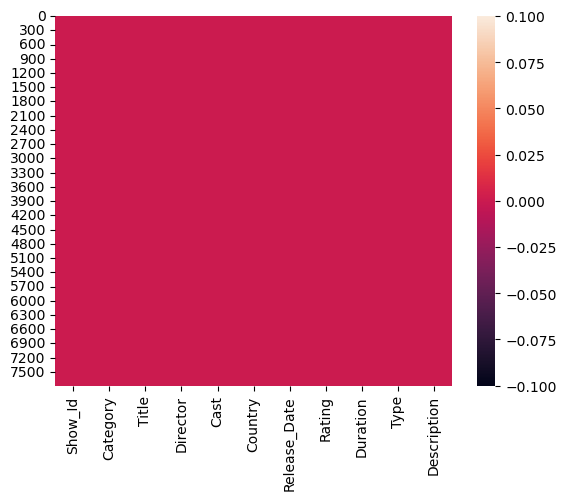

In [37]:
# grafik temiz olacaq. Bunun sebebi fillna() kodunun yardimi ile eksik olan deyerleri 0 lamisiq
sns.heatmap(df.isnull())

In [38]:
# for house of cards. what is show id and who is the director of this show

df['Show_Id'].value_counts()

Show_Id
s6621    2
s684     2
s1       1
s5186    1
s5198    1
        ..
s2593    1
s2592    1
s2591    1
s2590    1
s7787    1
Name: count, Length: 7787, dtype: int64

In [39]:
df['Title'].isin(['House of Cards'])

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Name: Title, Length: 7789, dtype: bool

In [40]:
df['Title'].value_counts()

Title
The Lost Okoroshi                          2
Backfire                                   2
3%                                         1
Revolt                                     1
Ricardo Quevedo: Hay gente así             1
                                          ..
Handsome Devil                             1
Hamza's Suitcase                           1
Hamid                                      1
Hamburger Hill                             1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
Name: count, Length: 7787, dtype: int64

In [41]:
df[df['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [42]:
# in which year heighest number of the tv show & movies released? show with bar graph

df.groupby(df['Category']=='Movie')['Show_Id'].count()

Category
False    2410
True     5379
Name: Show_Id, dtype: int64

In [43]:
df.groupby('Category').Category.count()

Category
Movie      5379
TV Show    2410
Name: Category, dtype: int64

In [44]:
df.groupby(df['Category'])['Show_Id'].count()

Category
Movie      5379
TV Show    2410
Name: Show_Id, dtype: int64

In [45]:
df.groupby(df['Category']=='Movie').count()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
Category,,,,,,,,,,,
False,2410,2410,2410,2410,2410,2410,2410,2410,2410,2410,2410
True,5379,5379,5379,5379,5379,5379,5379,5379,5379,5379,5379


In [46]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,0,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [47]:
# show all the movies that were weleased in year 2000 = 2000 yılında vizyona giren tüm filmleri göster

In [48]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      7789 non-null   object
 4   Cast          7789 non-null   object
 5   Country       7789 non-null   object
 6   Release_Date  7789 non-null   object
 7   Rating        7789 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [58]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [60]:
df.head(4)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,0,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


In [74]:
df.loc[(df['Category']=='Movie') & (df['Release_Date']=='August 14, 2020')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
877,s878,Movie,Beyond the Boundary: ICC Women's T20 World Cup...,Anna Stone,0,0,"August 14, 2020",TV-G,59 min,"Documentaries, International Movies, Sports Mo...","With highlights from the 2020 tourney, this pr..."
2138,s2139,Movie,Fearless,Cory Edwards,"Yara Shahidi, Miles Robbins, Miguel J. Pimente...",Canada,"August 14, 2020",TV-Y7,92 min,"Children & Family Movies, Comedies",A teen gamer is forced to level up to full-tim...
4462,s4463,Movie,Nigerian Prince,Faraday Okoro,"Antonio Bell, Chinaza Uche, Tina Mba, Bimbo Ma...","United States, Nigeria","August 14, 2020",TV-MA,104 min,"Dramas, Independent Movies",When a stubborn American teenager is sent to N...
4569,s4570,Movie,Octonauts & the Caves of Sac Actun,Blair Simmons,"Teresa Gallagher, Simon Greenall, Keith Wickha...",United Kingdom,"August 14, 2020",TV-Y,72 min,Children & Family Movies,The Octonauts embark on an underwater adventur...
4988,s4988,Movie,Project Power,"Henry Joost, Ariel Schulman","Jamie Foxx, Joseph Gordon-Levitt, Dominique Fi...",United States,"August 14, 2020",R,113 min,Action & Adventure,"An ex-soldier, a teen and a cop collide in New..."


In [ ]:
# show only the Title of all Shows that were released in India only = yalnızca Hindistan'da yayınlanan tüm Şovların yalnızca Başlığını göster


In [76]:
df.loc[(df['Category']=='TV Show')  & (df['Country']=='Brazil')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,0,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...
322,s323,TV Show,Afronta! Facing It!,Juliana Vicente,"Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,"October 31, 2020",TV-PG,1 Season,"Docuseries, International TV Shows",This docuseries spotlights Afro-Brazilian thin...
531,s532,TV Show,Anitta: Made In Honório,"Andrucha Waddington, Pedro Waddington",Anitta,Brazil,"December 16, 2020",TV-MA,1 Season,"Docuseries, International TV Shows","In this intimate documentary, Brazilian pop qu..."
989,s990,TV Show,Blood Pact,0,"Guilherme Fontes, Ravel Cabral, Jonathan Haage...",Brazil,"October 10, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An ambitious TV reporter uses risky and ethica...
1052,s1053,TV Show,Borges,0,"Thati Lopes, Antonio Pedro Tabet, Karina Ramil...",Brazil,"June 25, 2018",TV-MA,1 Season,"International TV Shows, TV Comedies",Left deeply in debt after their boss flees the...
1115,s1116,TV Show,Brotherhood,0,"Naruna Costa, Seu Jorge, Hermila Guedes, Lee T...",Brazil,"October 25, 2019",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An honest lawyer reaches a moral crossroads af...
1626,s1627,TV Show,Dating Around: Brazil,Cassia Dian,0,Brazil,"July 10, 2020",TV-14,1 Season,"International TV Shows, Reality TV, Romantic T...","In this reality show, six singles meet five di..."
1905,s1906,TV Show,Earth to Luna!,0,"Angelina Carballo, Raul-Gomez Pina, Eric Anderson",Brazil,"April 10, 2020",TV-Y,1 Season,Kids' TV,Curious about everything and excited about sci...
2486,s2487,TV Show,"Good Morning, Verônica",0,"Tainá Müller, Eduardo Moscovis, Camila Morgado...",Brazil,"October 1, 2020",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Mys...","While hunting for a dating-site predator, an u..."


In [77]:
# show categorisine aid olan ve Turkiyede yayinlanan show programlari
df.loc[(df['Category']=='TV Show')  & (df['Country']=='Turkey')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
45,s46,TV Show,Şubat,0,"Alican Yücesoy, Melisa Sözen, Musa Uzunlar, Se...",Turkey,"January 17, 2017",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An orphan subjected to tests that gave him sup...
80,s81,TV Show,20 Minutes,0,"Tuba Büyüküstün, Ilker Aksum, Bülent Emin Yara...",Turkey,"August 15, 2017",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","When his wife is convicted of murder, a horrif..."
815,s816,TV Show,Behzat Ç.,0,"Erdal Beşikçioğlu, Fatih Artman, İnanç Konukçu...",Turkey,"May 19, 2017",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An Ankara homicide detective with a dark perso...
952,s953,TV Show,Black Heart,0,"Barış Kılıç, Tuvana Türkay, Serhat Tutumluer, ...",Turkey,"October 12, 2018",TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Blaming a crooked media mogul for the death of...
958,s959,TV Show,Black Money Love,Ahmet Katıksız,"Güler Ökten, Hazal Türesan, İlkin Tüfekçi, Bed...",Turkey,"October 15, 2019",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a cop's fiancée and a jewelry designer's...
1144,s1145,TV Show,Burned Cocoon,0,"Yavuz Bingöl, Basak Köklükaya, Çolpan Ilhan, M...",Turkey,"April 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas",A secret marriage unites two families – one we...
2032,s2033,TV Show,Ethos,0,"Öykü Karayel, Fatih Artman, Funda Eryiğit, Def...",Turkey,"November 12, 2020",TV-MA,1 Season,"International TV Shows, TV Dramas",A group of individuals in Istanbul transcend s...
2081,s2082,TV Show,Ezel,0,"Kenan İmirzalıoğlu, Cansu Dere, Haluk Bilginer...",Turkey,"December 26, 2016",TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A young man framed for a crime escapes a priso...
2160,s2161,TV Show,Filinta,0,"Onur Tuna, Serhat Tutumluer, Mehmet Özgür, Naz...",Turkey,"April 15, 2017",TV-14,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...","In 19th-century Istanbul, a young police offic..."


In [8]:
df['Type'].isin(['Comedies', 'Dramas'])

0       False
1       False
2       False
3       False
4        True
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Name: Type, Length: 7789, dtype: bool

In [9]:
df['Type'].isin(['Comedies', 'Dramas']).count()

7789

In [11]:
df['Type'].value_counts()

Type
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 492, dtype: int64

In [12]:
df['Type'].isin(['Documentaries','Crime']).count()

7789

In [13]:
df['Type'].isin(['Documentaries','Crime'])

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Name: Type, Length: 7789, dtype: bool

In [20]:
df[(df['Category']=='Movie') &  (df['Cast']=='Erdem Yener')].count()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [ ]:
df

In [78]:
df.loc[(df['Category']=='Movie') & (df['Country']=='Turkey')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
40,s41,Movie,Çarsi Pazar,Muharrem Gülmez,"Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem G...",Turkey,"March 10, 2017",TV-14,97 min,"Comedies, International Movies",The slacker owner of a public bath house ralli...
42,s43,Movie,Çok Filim Hareketler Bunlar,Ozan Açıktan,"Ayça Erturan, Aydan Taş, Ayşegül Akdemir, Burc...",Turkey,"March 10, 2017",TV-MA,99 min,"Comedies, International Movies",Vignettes of the summer holidays follow vacati...
156,s157,Movie,A Chaster Marriage,Umut Kirca,"Emre Karayel, Ceren Moray, Begüm Kütük, Ececan...",Turkey,"October 2, 2020",TV-14,94 min,"Comedies, International Movies, Romantic Movies","Forced to wed his childhood friend, a man obse..."
263,s264,Movie,Aşk Tesadüfleri Sever,Ömer Faruk Sorak,"Mehmet Günsür, Belçim Bilgin, Ayda Aksel, Alta...",Turkey,"April 4, 2018",TV-MA,122 min,"Dramas, International Movies, Romantic Movies",A series of coincidences brings two star-cross...
385,s386,Movie,Ali Baba ve 7 Cüceler,Cem Yılmaz,"Cem Yılmaz, Irina Ivkina, Çetin Altay, Zafer A...",Turkey,"July 1, 2020",TV-MA,115 min,"Action & Adventure, Comedies, International Mo...",A garden gnome vendor and his brother-in-law a...
...,...,...,...,...,...,...,...,...,...,...,...
7201,s7200,Movie,Travel Mates 2,Bedran Güzel,"Oğuzhan Koç, İbrahim Büyükak, Ezgi Eyüboğlu, O...",Turkey,"September 20, 2019",TV-MA,111 min,"Comedies, International Movies",When struggling singer Onur decides to return ...
7274,s7273,Movie,Turkish Dance School,Burak Aksak,"Binnur Kaya, Demet Özdemir, Uraz Kaygılaroğlu,...",Turkey,"October 2, 2020",TV-MA,107 min,"Comedies, International Movies, Romantic Movies",A woman recovering from an attempted suicide m...
7440,s7439,Movie,Vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"March 10, 2017",NR,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir..."
7441,s7440,Movie,Vizontele Tuuba,Yılmaz Erdoğan,"Yılmaz Erdoğan, Tarık Akan, Altan Erkekli, Cez...",Turkey,"March 10, 2017",NR,106 min,"Comedies, Dramas, International Movies","With civil war looming, a TV-obsessed Turkish ..."


In [80]:
# Show top 10 Directors who gave the highest number of The Shows & Movies to Netflix=Netflix'e en çok Şovlar ve Filmler veren ilk 10 Yönetmeni göster

In [88]:
df['Description'].value_counts().head(10)

Description
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                3
After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.    2
As a blind librarian, dispirited cricketer and desolate psychiatrist each seek retribution and release, their lives overlap under eerie influences.         2
A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.                       2
When Elastigirl gets recruited for a high-profile crime-fighting mission, Mr. Incredible takes on his toughest assignment ever: full-time parenting.        2
From controversial cartoonist to powerfu

In [ ]:
# Show all the Records, where 'Category is Movie and Types in Comediles' or Country is United Kingdom = 'Kategorinin Film ve Komedi Türleri olduğu' veya Ülkenin Birleşik Krallık olduğu tüm Kayıtları göster

In [89]:
df[(df['Category']=='Movie') & (df['Type']=='Comedies')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China","February 14, 2020",R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back..."
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,"January 26, 2018",TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""..."
...,...,...,...,...,...,...,...,...,...,...,...
7341,s7340,Movie,Undercover Brother 2,Leslie Small,"Michael Jai White, Vince Swann, Barry Bostwick...",United States,"November 5, 2019",R,85 min,Comedies,When a beloved secret agent falls deep into a ...
7590,s7589,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,"January 22, 2018",R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w..."
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States","May 13, 2017",PG-13,86 min,Comedies,"When insurance accidentally pays her millions,..."
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,When longtime friends meet up for a wine-soake...


In [93]:
df[(df['Category']=='Movie') & (df['Type']=='Comedies')| (df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,0,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
58,s59,TV Show,100% Hotter,0,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,0,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
7671,s7670,TV Show,World's Busiest Cities,0,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,0,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


In [ ]:
# in how many movies/ show Tom Cruise was cast = Tom Cruise kaç filmde/dizide rol aldı?

In [95]:
df.loc[(df['Cast']=='Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [100]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', 0,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [106]:
df['Rating'].nunique()

15

In [ ]:
# Netflix'te bir Filmin/Şovun maksimum süresi ne kadardır?

In [110]:
df['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [111]:
df['Duration'].unique().max()

'99 min'

In [119]:
df['Duration'].unique().min()

'1 Season'